In [203]:
import matplotlib.pyplot as plt
import os
import numpy as np
if("Analysis" in os.getcwd()):
    os.chdir("../")

from Data_handling.pca_functions import Pca_Fitting
from Data_handling.gaia_query import gaia_cone, bailer_jones_cone, concatenate_gaia_bailer
from Data_handling.vae import Encoder,Decoder, VAE , loss_function, model_train


os.chdir("Analysis")
os.getcwd()

'/Users/mattocallaghan/GES/Analysis'

In [204]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torch.optim import Adam
from torch.utils.data import DataLoader

from sklearn.preprocessing import MinMaxScaler

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [205]:
scaler=MinMaxScaler(feature_range=(-1, 1))

In [206]:
batch_size = 100 #617 #factor for 1090
lr = 1e-3
epochs = 100

In [207]:
mean = [0,0]
cov = [[1,0],[0,1]]
colour_mag = scaler.fit_transform(np.random.multivariate_normal(mean, cov,size=10000))

In [208]:
vae_spec=DataLoader(torch.tensor(colour_mag).float(),batch_size=batch_size) 

In [209]:
zdim=2

In [210]:
encoder = Encoder(input_dim=colour_mag.shape[1], hidden_dims=[50,50], z_dim=zdim,dropout=0.2)
decoder = Decoder(output_dim=colour_mag.shape[1], hidden_dims = [50,50], z_dim=zdim,dropout=0.2)
model = VAE(Encoder=encoder, Decoder=decoder).to(DEVICE)
optimizer=Adam(model.parameters(),lr=lr)

In [211]:
print("Start training VAE...")
model.train()
model_train(vae_spec=vae_spec,model=model,optimizer=optimizer,loss_function=loss_function,epochs=epochs,batch_size=batch_size)

Start training VAE...
	Epoch 1 complete! 	Average Loss:  0.09535677572693488
Overall Loss:  944.0320796966553
	Epoch 2 complete! 	Average Loss:  0.0769335649952744
Overall Loss:  761.6422934532166
	Epoch 3 complete! 	Average Loss:  0.07422968406869908
Overall Loss:  734.8738722801208
	Epoch 4 complete! 	Average Loss:  0.07377320092133802
Overall Loss:  730.3546891212463
	Epoch 5 complete! 	Average Loss:  0.07345429377122359
Overall Loss:  727.1975083351135
	Epoch 6 complete! 	Average Loss:  0.07293614806550922
Overall Loss:  722.0678658485413
	Epoch 7 complete! 	Average Loss:  0.07266764900901101
Overall Loss:  719.409725189209
	Epoch 8 complete! 	Average Loss:  0.07235422596786961
Overall Loss:  716.3068370819092
	Epoch 9 complete! 	Average Loss:  0.0724152175344602
Overall Loss:  716.910653591156
	Epoch 10 complete! 	Average Loss:  0.0723649053380947
Overall Loss:  716.4125628471375
	Epoch 11 complete! 	Average Loss:  0.0720791503636524
Overall Loss:  713.5835886001587
	Epoch 12 comp

In [212]:
model.eval()

VAE(
  (Encoder): Encoder(
    (hidden1): Linear(in_features=2, out_features=50, bias=True)
    (hidden2): Linear(in_features=50, out_features=50, bias=True)
    (nn_mu): Linear(in_features=50, out_features=2, bias=True)
    (nn_log_sigma): Linear(in_features=50, out_features=2, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
    (relu): ReLU()
    (softplus): Softplus(beta=1, threshold=20)
  )
  (Decoder): Decoder(
    (hidden1): Linear(in_features=2, out_features=50, bias=True)
    (hidden2): Linear(in_features=50, out_features=50, bias=True)
    (nn_out): Linear(in_features=50, out_features=2, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
    (relu): ReLU()
    (softplus): Softplus(beta=1, threshold=20)
  )
)

In [213]:
x_recon=model(torch.tensor(colour_mag).float())[0].detach().numpy()

In [214]:
z_mean=model(torch.tensor(colour_mag).float())[1].detach().numpy()
z_log_var=model(torch.tensor(colour_mag).float())[2].detach().numpy()

z=model(torch.tensor(colour_mag).float())[3].detach().numpy()

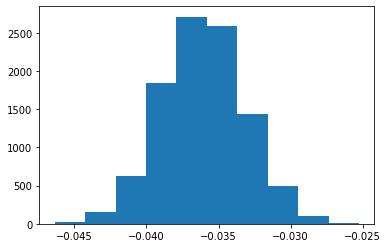

In [215]:
plt.hist(x_recon.transpose()[0])
plt.show()

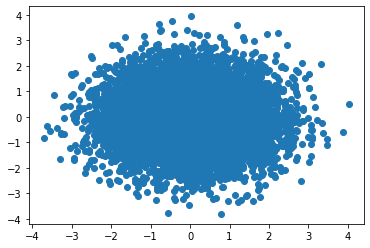

In [217]:
#plt.scatter(colour_mag.transpose()[0],colour_mag.transpose()[1])
plt.scatter(x_recon.transpose()[0],x_recon.transpose()[1])
